In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz

from sklearn import tree
from os import system


In [5]:
df = pd.read_csv('bank.csv')


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Exploratory Data Analyses:


In [7]:
df.shape

(45211, 17)

In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [9]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [12]:
for i in list(df.columns[df.dtypes=='int64']):  
    print(i)
    print('Value counts for', i)
    print(df[i].value_counts().sort_values(ascending=False).head())
    print('___________________________________________')
    print('Value counts for',i, 'normalized:')
    print(df[i].value_counts(normalize=True).sort_values(ascending=False).head())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

age
Value counts for age
32    2085
31    1996
33    1972
34    1930
35    1894
Name: age, dtype: int64
___________________________________________
Value counts for age normalized:
32   0.05
31   0.04
33   0.04
34   0.04
35   0.04
Name: age, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
balance
Value counts for balance
0    3514
1     195
2     156
4     139
3     134
Name: balance, dtype: int64
___________________________________________
Value counts for balance normalized:
0   0.08
1   0.00
2   0.00
4   0.00
3   0.00
Name: balance, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
day
Value counts for day
20    2752
18    2308
21    2026
17    1939
6     1932
Name: day, dtype: int64
___________________________________________
Value counts for day normalized:
20   0.06
18   0.05
21   0.04
17   0.04
6    0.04
Name: day, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++

In [13]:
for i in list(df.columns[df.dtypes=='object']):  
    print(i)
    print('Value counts for', i)
    print(df[i].value_counts().sort_values(ascending=False).head())
    print('___________________________________________')
    print('Value counts for',i, 'normalized:')
    print(df[i].value_counts(normalize=True).sort_values(ascending=False).head())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

job
Value counts for job
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
Name: job, dtype: int64
___________________________________________
Value counts for job normalized:
blue-collar   0.22
management    0.21
technician    0.17
admin.        0.11
services      0.09
Name: job, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
marital
Value counts for marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
___________________________________________
Value counts for marital normalized:
married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
education
Value counts for education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
___________________________________________
Value counts for education

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [15]:
# There appear to be no missing values.

no     39922
yes     5289
Name: Target, dtype: int64


<AxesSubplot:xlabel='Target', ylabel='count'>

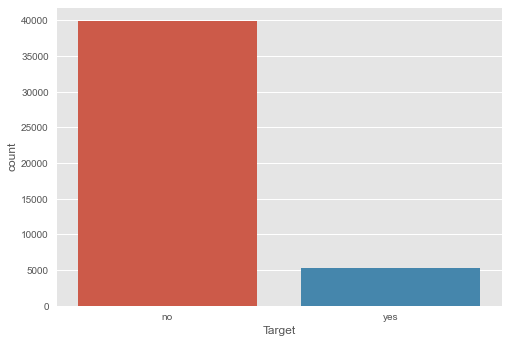

In [16]:
print(df.Target.value_counts())
sns.countplot(x='Target', data=df)

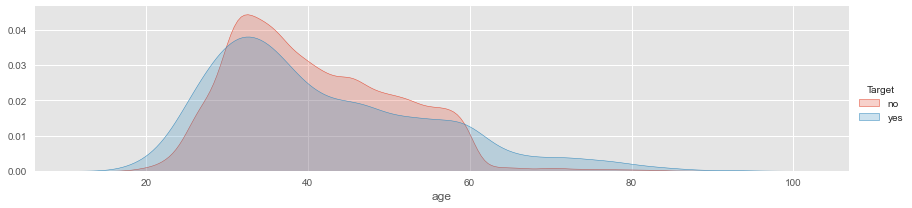

In [17]:
fig = sns.FacetGrid(df,hue='Target',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
fig.add_legend()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<AxesSubplot:xlabel='count', ylabel='job'>

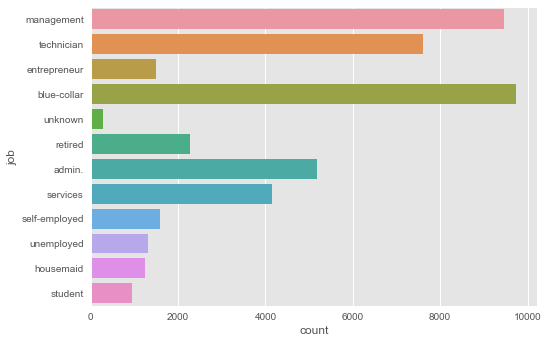

In [18]:
print(df.job.value_counts())
sns.countplot(y='job', data=df)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<AxesSubplot:xlabel='marital', ylabel='count'>

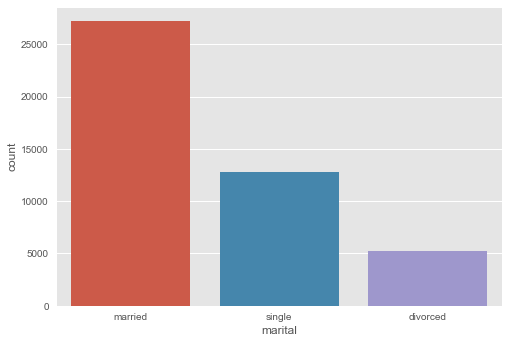

In [19]:
print(df.marital.value_counts())
sns.countplot(x='marital', data=df)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

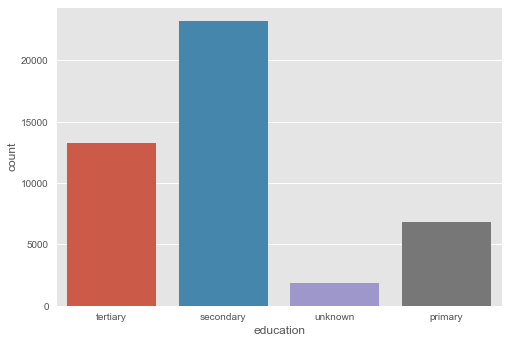

In [20]:
print(df.education.value_counts())
sns.countplot(x='education', data=df)

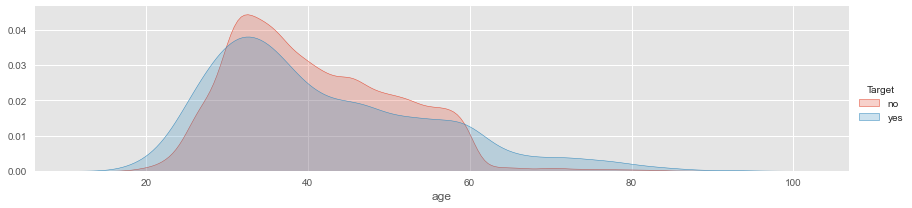

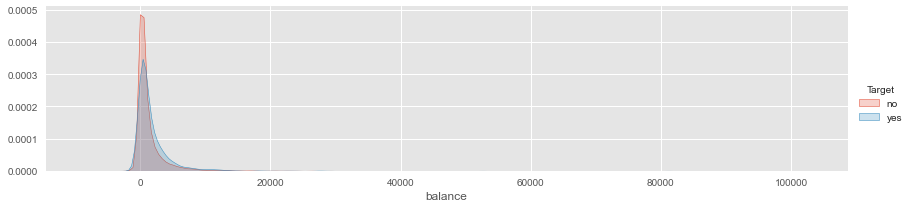

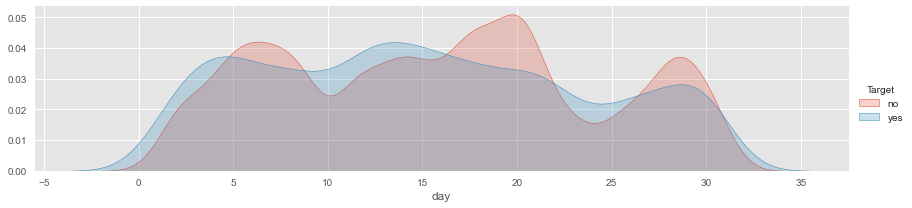

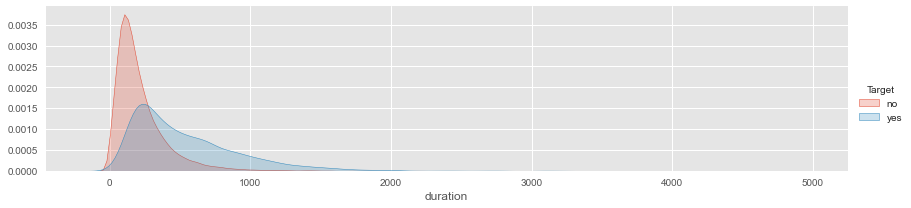

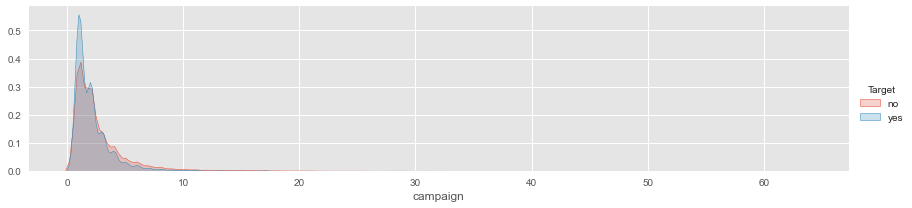

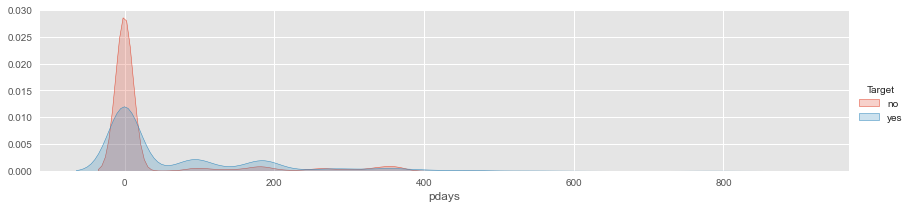

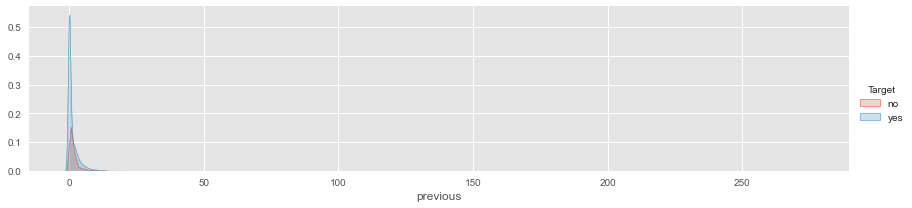

In [21]:
for i in list(df.columns[df.dtypes=='int64']):
    fig = sns.FacetGrid(df,hue='Target',aspect=4)
    fig.map(sns.kdeplot, i ,shade=True)
    fig.add_legend()

--Insights:

Ages 25-40 seem to be a particularly common age for subscribing to a term deposit, this would be a good age group to target for a marketing campaign.

Campaign contacts lose effectiveness after ~2 contacts. Customers seem most likely to subscribe to a term deposit if they were contacted ~3 or less times by the campaign team.

pdays shows that for the greatest likelihood of a custome subscribing to a term deposit, they should be contacted within 50 days of their previous contact.

Call durations of ~8 minutes were the ones most likely to be successful at getting a customer to subscribe to a term deposit.

Text(0.5, 1.0, 'Count Plot of job for target variable')

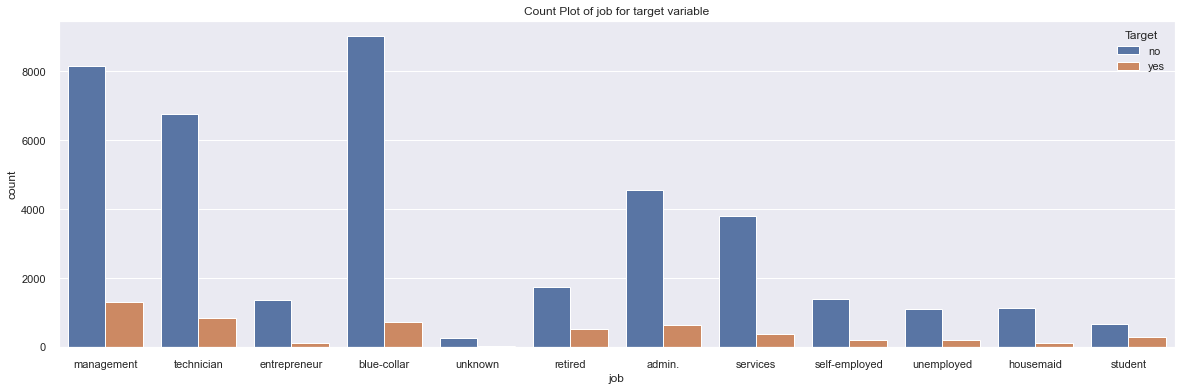

In [22]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['Target'])
plt.title('Count Plot of job for target variable')

Text(0.5, 1.0, 'Count Plot of marital for target variable')

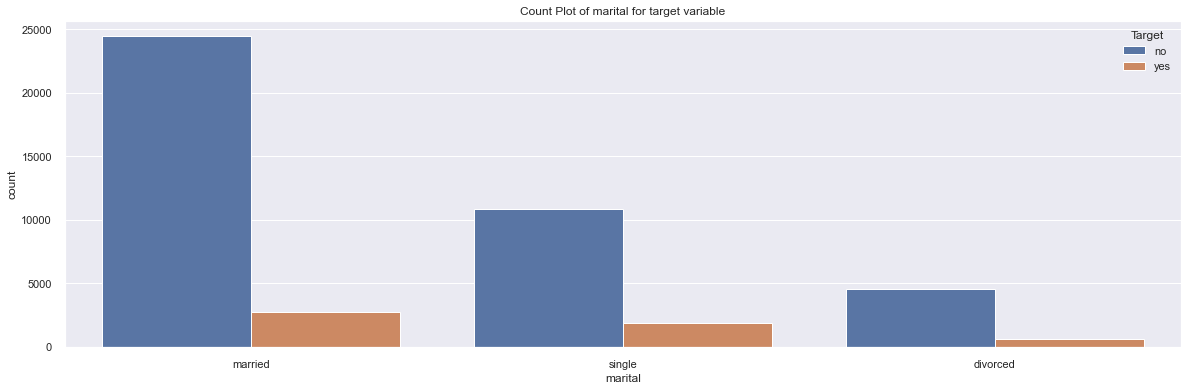

In [23]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['marital'], data=df, hue=df['Target'])
plt.title('Count Plot of marital for target variable')

Text(0.5, 1.0, 'Count Plot of marital for target variable')

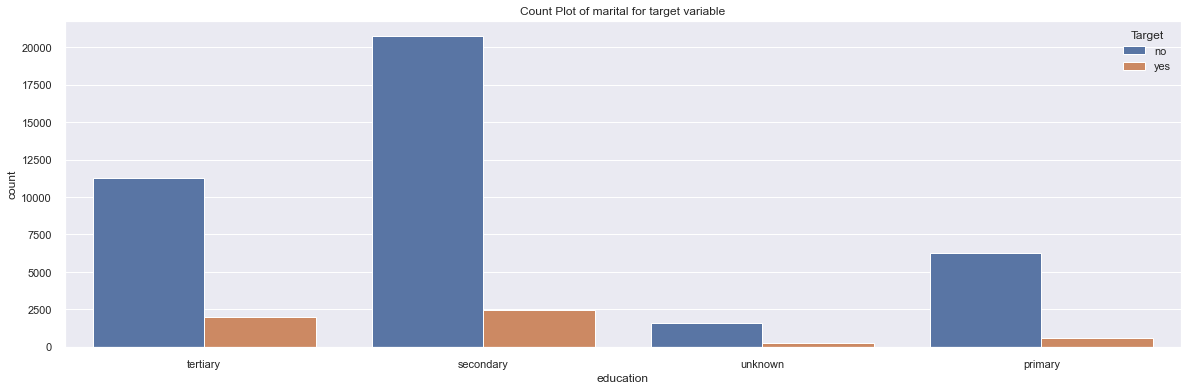

In [24]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['education'], data=df, hue=df['Target'])
plt.title('Count Plot of marital for target variable')

Text(0.5, 1.0, 'Count Plot of default for target variable')

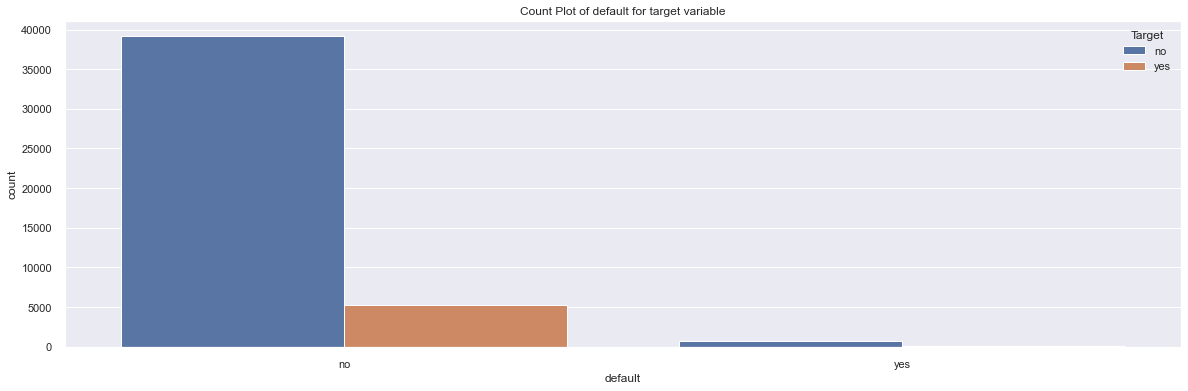

In [25]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['default'], data=df, hue=df['Target'])
plt.title('Count Plot of default for target variable')

Text(0.5, 1.0, 'Count Plot of housing for target variable')

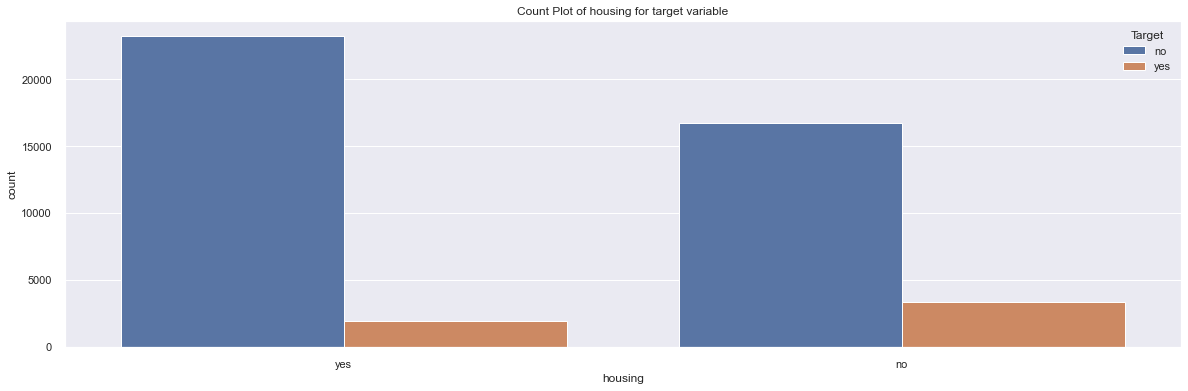

In [26]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['housing'], data=df, hue=df['Target'])
plt.title('Count Plot of housing for target variable')

Text(0.5, 1.0, 'Count Plot of loan status for target variable')

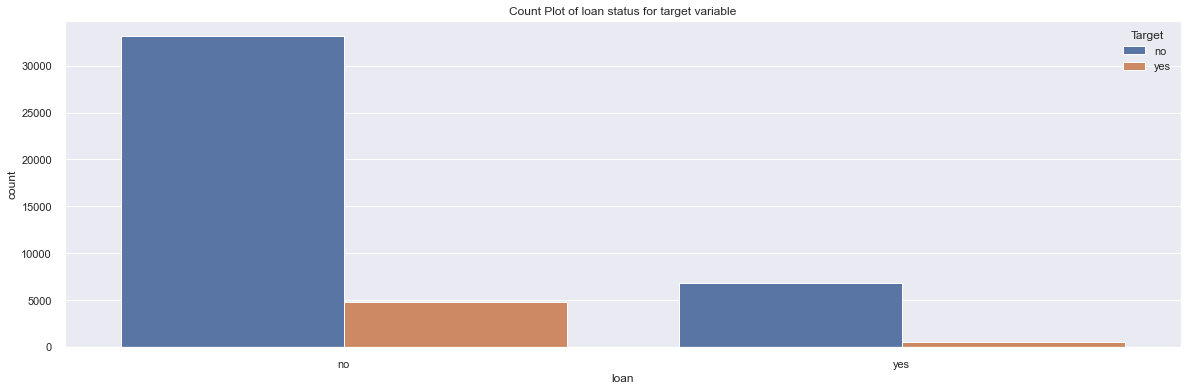

In [27]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['loan'], data=df, hue=df['Target'])
plt.title('Count Plot of loan status for target variable')

Text(0.5, 1.0, 'Count Plot of contact for target variable')

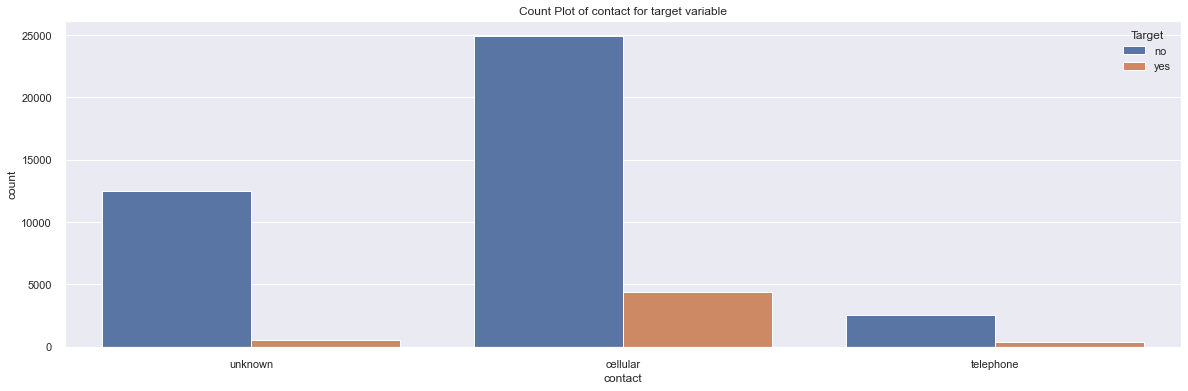

In [28]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['contact'], data=df, hue=df['Target'])
plt.title('Count Plot of contact for target variable')

Text(0.5, 1.0, 'Count Plot of month for target variable')

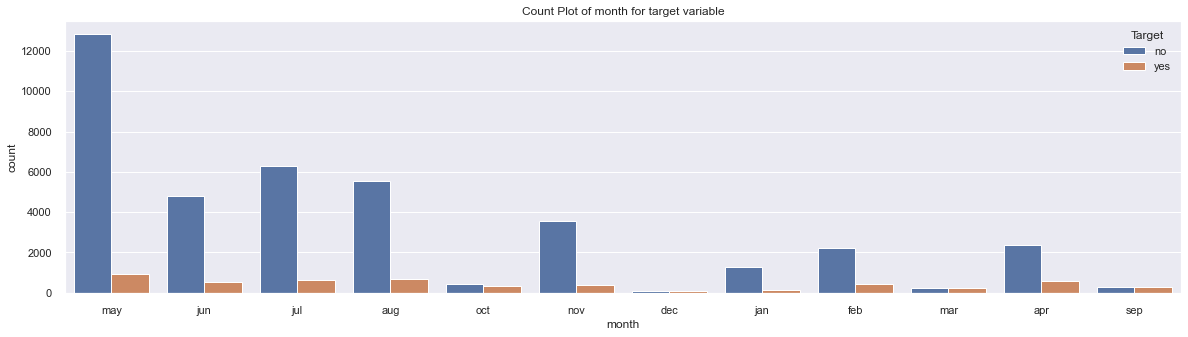

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x=df['month'], data=df, hue=df['Target'])
plt.title('Count Plot of month for target variable')

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

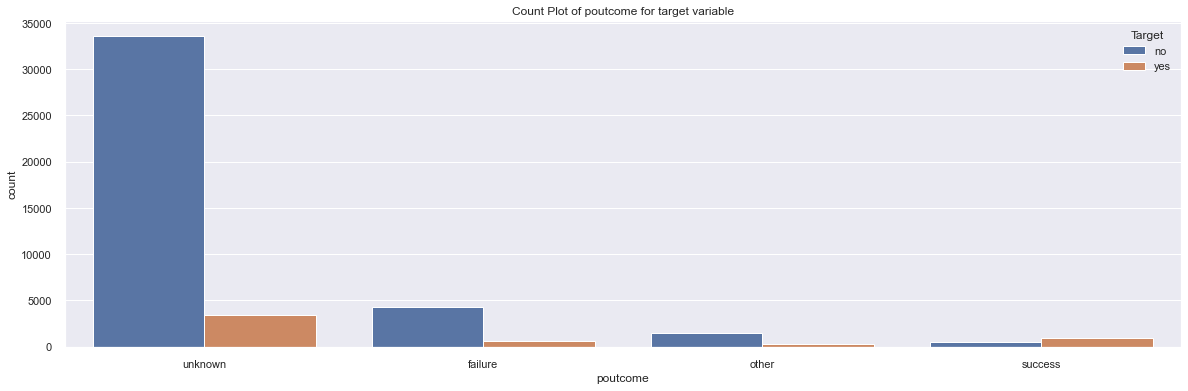

In [32]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['poutcome'], data=df, hue=df['Target'])
plt.title('Count Plot of poutcome for target variable')

-- Insights:

People most likely to subscribe to term deposits:

- job: blue collar/management

- education: secondary

- marital: married

- loan: people who do not have a personal loan

- default: People who haven't had credit in default

- housing: People who have a housing loan

- contact: people who were contacted on their cell phone

- month: people who were contact in May.

--Method

changing unknown values to most frequently seen values

In [33]:
imr = SimpleImputer(missing_values= 'unknown', strategy='most_frequent')

In [34]:
for i in list(df.columns[df.dtypes=='object']):
    imr = imr.fit(df[[i]])
    df[i] = imr.transform(df[[i]]).ravel()

In [35]:
for i in list(df.columns[df.dtypes=='object']):  
    print(i)
    print('Value counts for', i)
    print(df[i].value_counts().sort_values(ascending=False).head())
    print()

job
Value counts for job
blue-collar    10020
management      9458
technician      7597
admin.          5171
services        4154
Name: job, dtype: int64

marital
Value counts for marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
Value counts for education
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

default
Value counts for default
no     44396
yes      815
Name: default, dtype: int64

housing
Value counts for housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
Value counts for loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
Value counts for contact
cellular     42305
telephone     2906
Name: contact, dtype: int64

month
Value counts for month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
Name: month, dtype: int64

poutcome
Value counts for poutcome
failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64

Target
Value

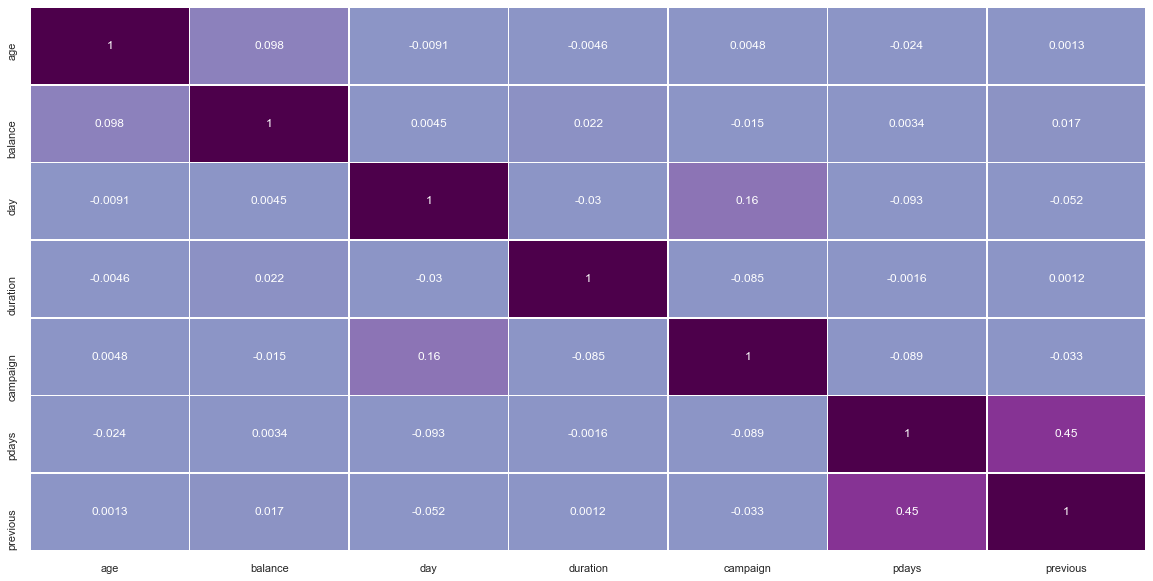

In [36]:
plt.subplots(figsize=(20,10))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="BuPu",
           vmin=0, vmax=0.8)

plt.show()

--Insight

Correlation matrix before dummie variables shows no significant correlations.

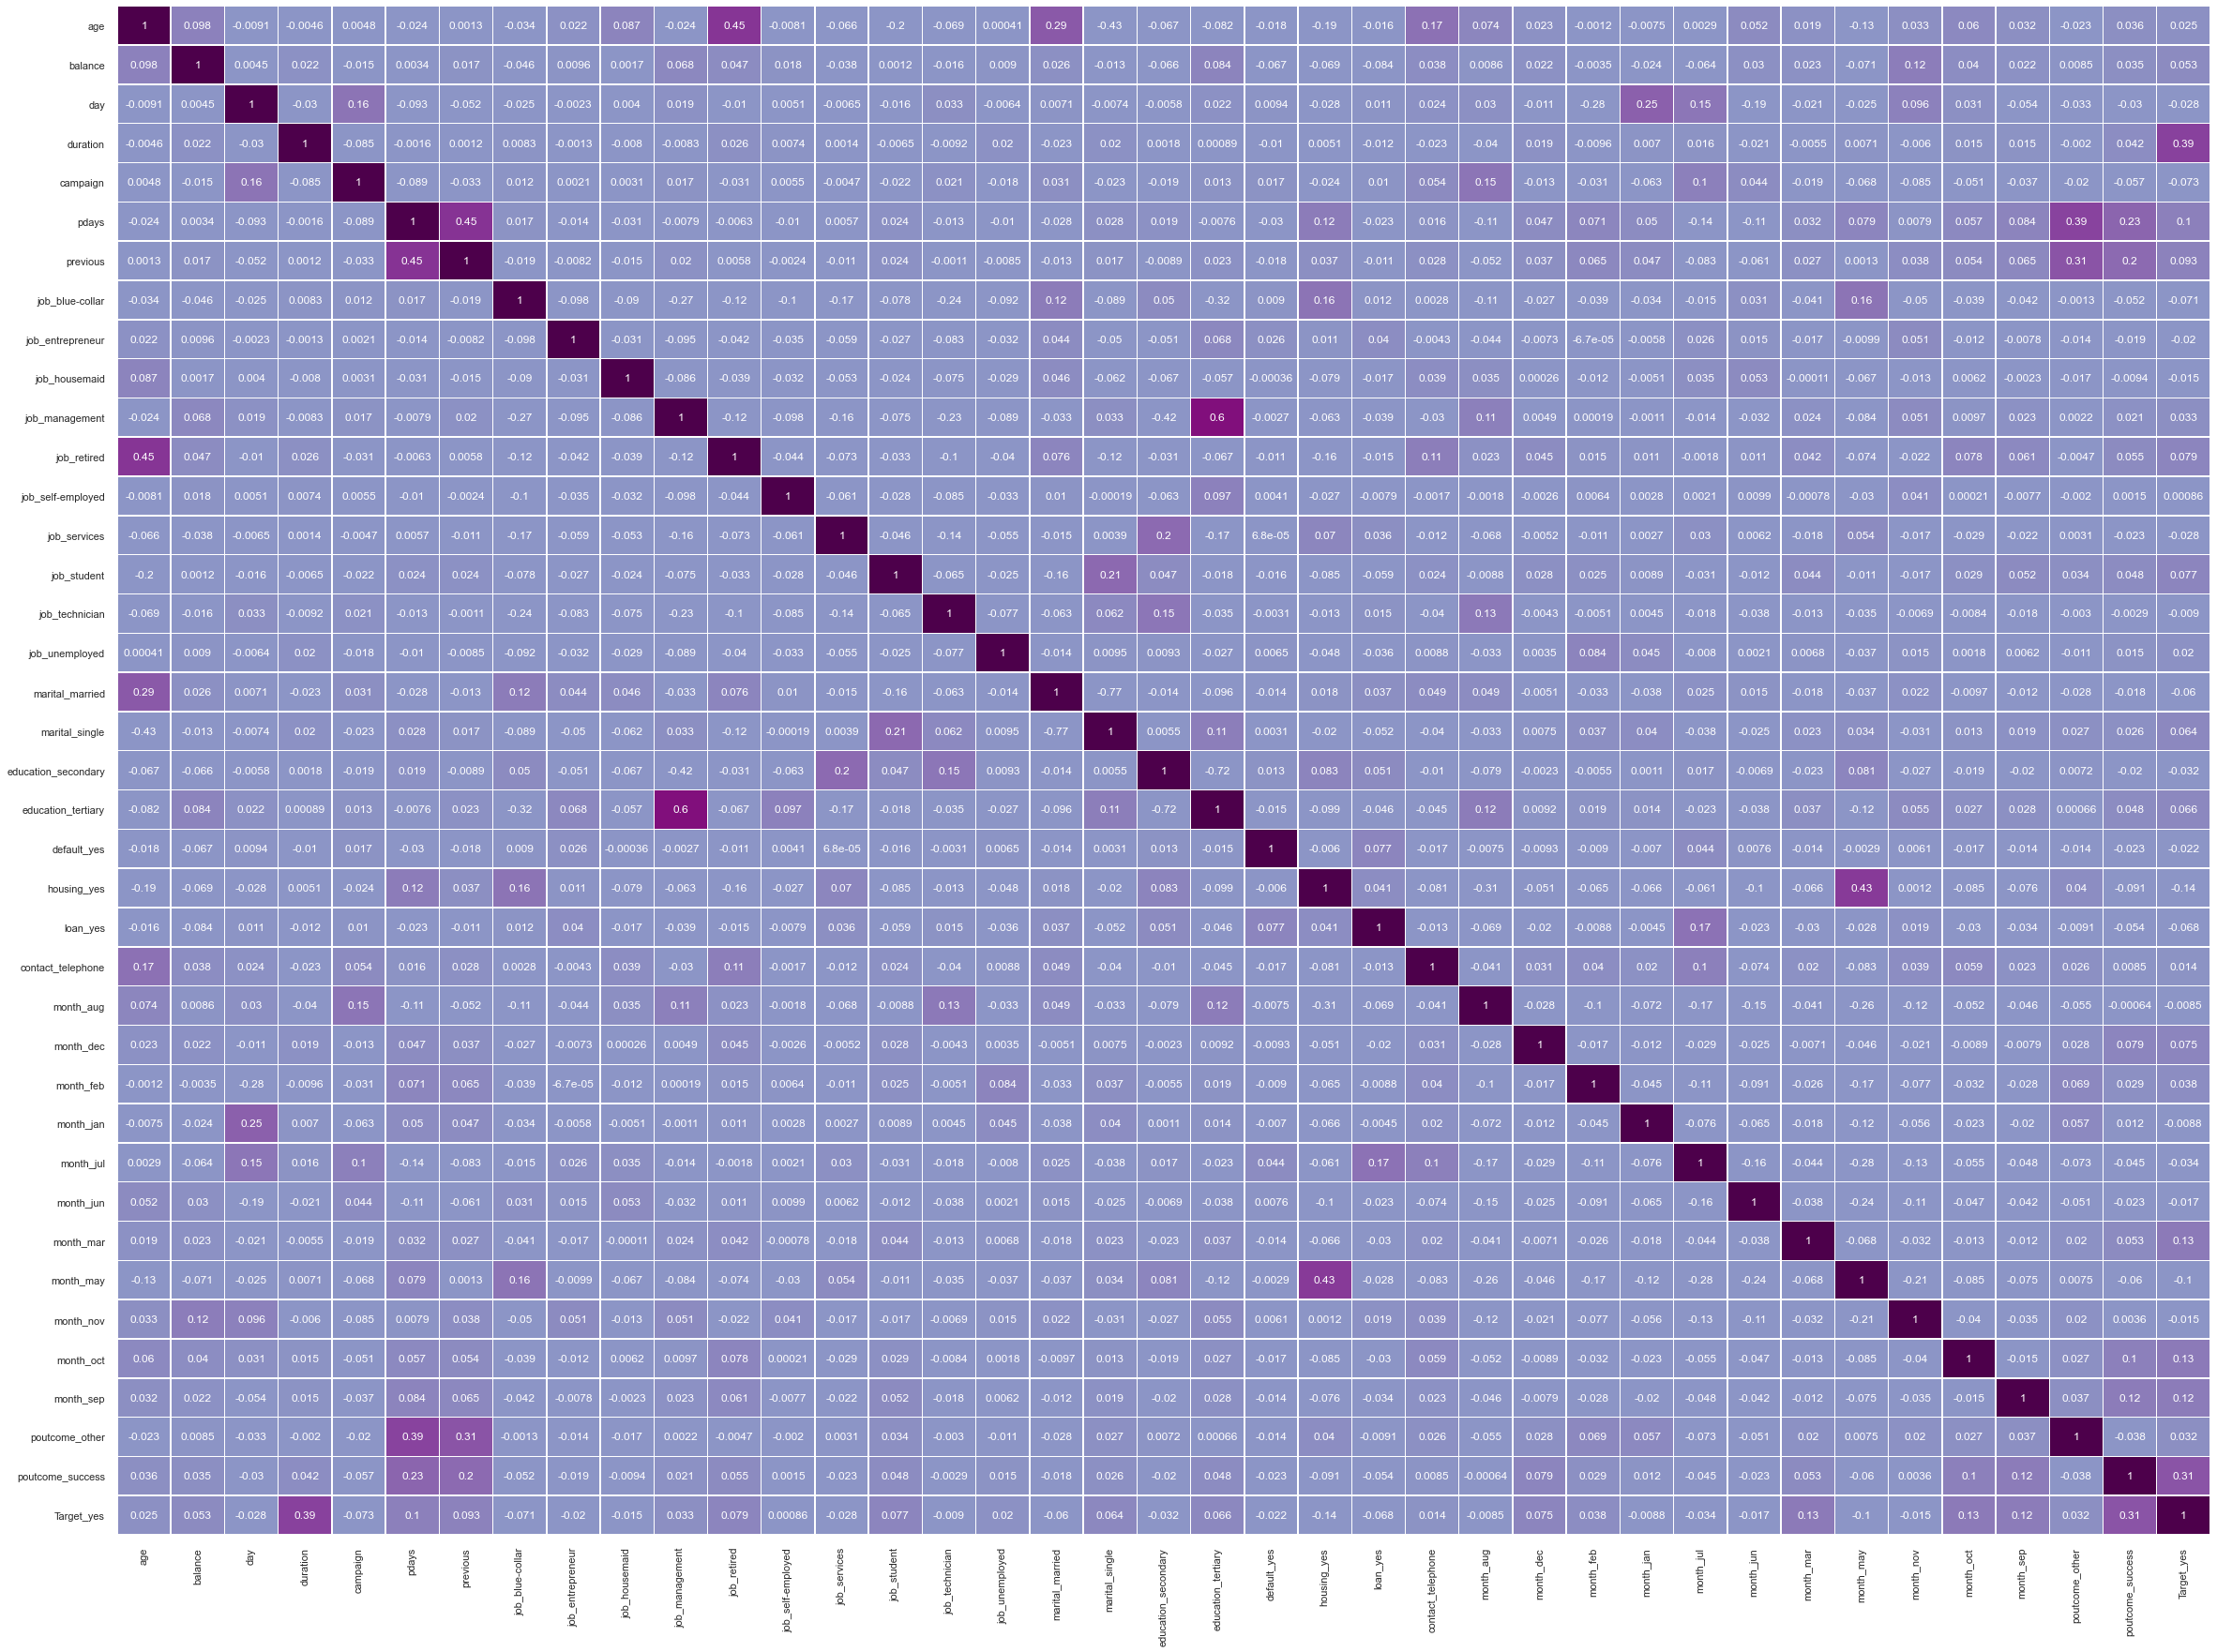

In [37]:
df_dum = pd.get_dummies(df, drop_first=True)
plt.subplots(figsize=(40,30))
sns.heatmap(df_dum.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="BuPu",
           vmin=0, vmax=0.8)

plt.show()

--Insight

Correlation matrix shows no correlations over 0.8, probably don't need to remove any columns as a result.

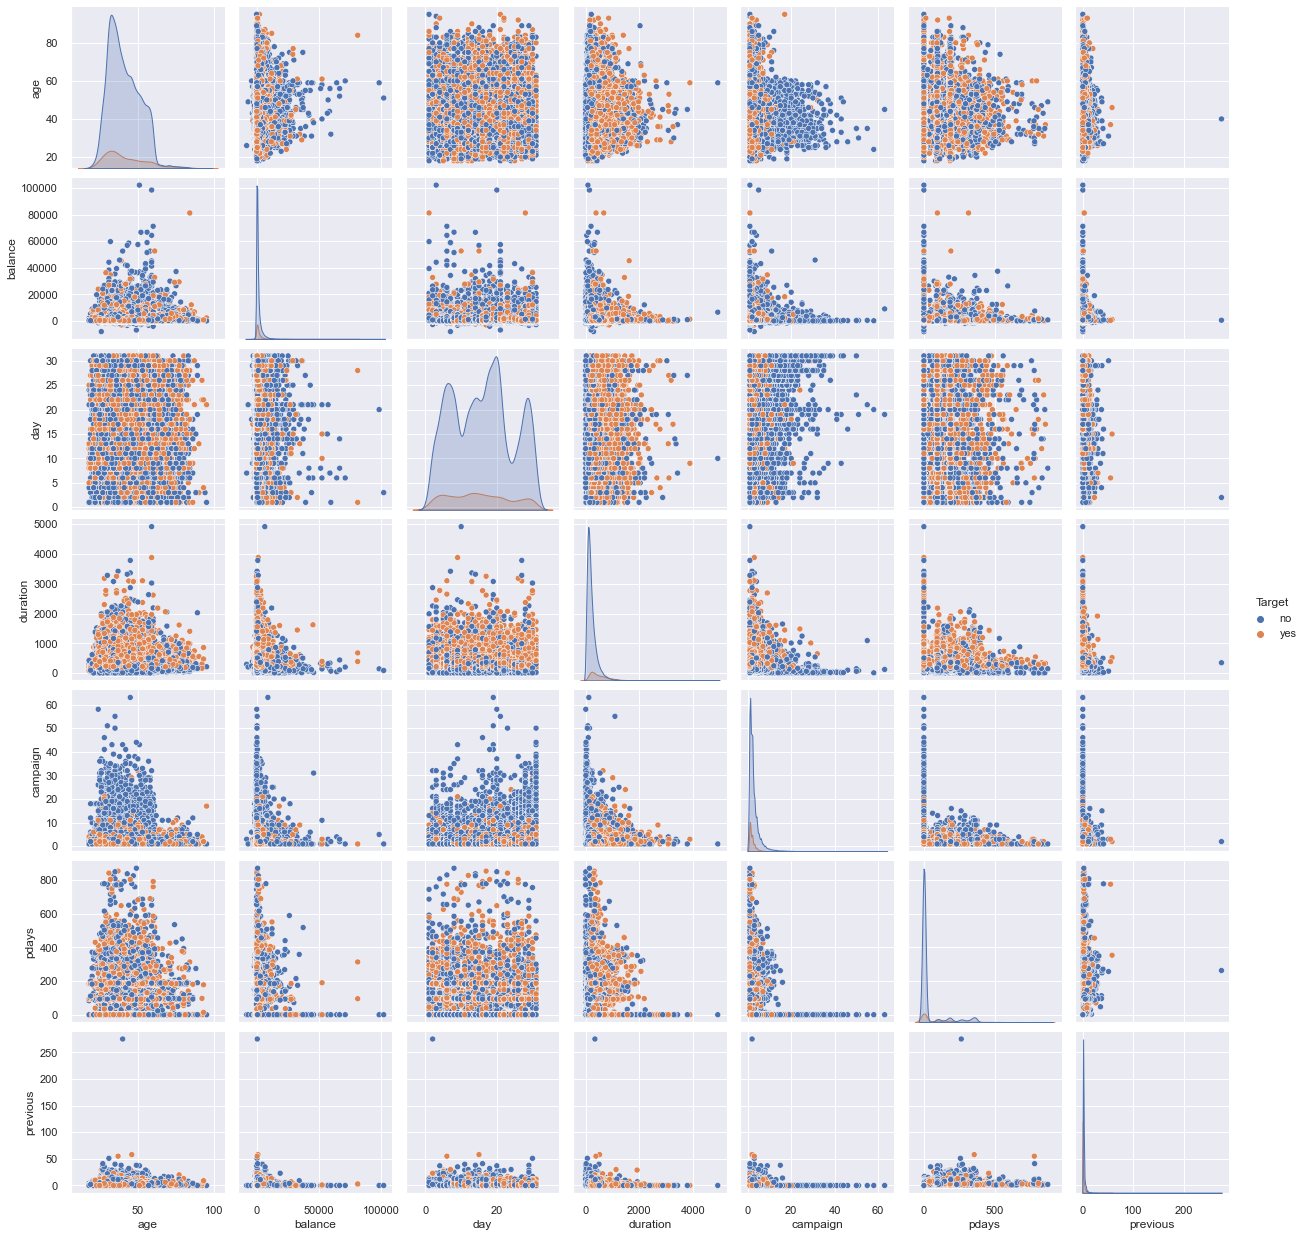

In [38]:
sns.pairplot(df, hue = 'Target')

--Insight

No linear or logistic relations are easily seen by observing pairplots.

In [39]:
#getting data ready for models

--Method

Scaling the numeric columns, and setting up the data that will be separated into training and testing sets:

In [40]:
scaler = StandardScaler()
cols = ['age','balance','day','duration','campaign', 'pdays', 'previous']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1.61,management,married,tertiary,no,0.26,yes,no,cellular,-1.30,may,0.01,-0.57,-0.41,-0.25,failure,no
1,0.29,technician,single,secondary,no,-0.44,yes,no,cellular,-1.30,may,-0.42,-0.57,-0.41,-0.25,failure,no
2,-0.75,entrepreneur,married,secondary,no,-0.45,yes,yes,cellular,-1.30,may,-0.71,-0.57,-0.41,-0.25,failure,no
3,0.57,blue-collar,married,secondary,no,0.05,yes,no,cellular,-1.30,may,-0.65,-0.57,-0.41,-0.25,failure,no
4,-0.75,blue-collar,single,secondary,no,-0.45,no,no,cellular,-1.30,may,-0.23,-0.57,-0.41,-0.25,failure,no


In [41]:
replaceStruct = {"Target": {"no":0, "yes":1}}
dff = df.replace(replaceStruct)

In [42]:
X2 = dff.drop('Target', axis=1)
y = dff['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [43]:
y.tail()

45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, dtype: int64

--Method

Creating dummy variables for categorical variables

In [44]:
X = pd.get_dummies(X2, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   job_blue-collar      45211 non-null  uint8  
 8   job_entrepreneur     45211 non-null  uint8  
 9   job_housemaid        45211 non-null  uint8  
 10  job_management       45211 non-null  uint8  
 11  job_retired          45211 non-null  uint8  
 12  job_self-employed    45211 non-null  uint8  
 13  job_services         45211 non-null  uint8  
 14  job_student          45211 non-null  uint8  
 15  job_technician       45211 non-null 

In [45]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",0.00,1.00,-2.16,-0.75,-0.18,0.67,5.09
balance,"45,211.00",0.00,1.00,-3.08,-0.42,-0.30,0.02,33.09
day,"45,211.00",-0.00,1.00,-1.78,-0.94,0.02,0.62,1.83
duration,"45,211.00",0.00,1.00,-1.00,-0.60,-0.30,0.24,18.09
campaign,"45,211.00",0.00,1.00,-0.57,-0.57,-0.25,0.08,19.44
pdays,"45,211.00",-0.00,1.00,-0.41,-0.41,-0.41,-0.41,8.30
previous,"45,211.00",0.00,1.00,-0.25,-0.25,-0.25,-0.25,119.14
job_blue-collar,"45,211.00",0.22,0.42,0.00,0.00,0.00,0.00,1.00
job_entrepreneur,"45,211.00",0.03,0.18,0.00,0.00,0.00,0.00,1.00
job_housemaid,"45,211.00",0.03,0.16,0.00,0.00,0.00,0.00,1.00


In [46]:
X.corr()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00,-0.03,0.02,0.09,...,-0.01,0.00,0.05,0.02,-0.13,0.03,0.06,0.03,-0.02,0.04
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02,-0.05,0.01,0.00,...,-0.02,-0.06,0.03,0.02,-0.07,0.12,0.04,0.02,0.01,0.04
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05,-0.02,-0.00,0.00,...,0.25,0.15,-0.19,-0.02,-0.03,0.10,0.03,-0.05,-0.03,-0.03
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,0.01,-0.00,-0.01,...,0.01,0.02,-0.02,-0.01,0.01,-0.01,0.02,0.02,-0.00,0.04
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03,0.01,0.00,0.00,...,-0.06,0.10,0.04,-0.02,-0.07,-0.08,-0.05,-0.04,-0.02,-0.06
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45,0.02,-0.01,-0.03,...,0.05,-0.14,-0.11,0.03,0.08,0.01,0.06,0.08,0.39,0.23
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00,-0.02,-0.01,-0.02,...,0.05,-0.08,-0.06,0.03,0.00,0.04,0.05,0.06,0.31,0.20
job_blue-collar,-0.03,-0.05,-0.02,0.01,0.01,0.02,-0.02,1.00,-0.10,-0.09,...,-0.03,-0.01,0.03,-0.04,0.16,-0.05,-0.04,-0.04,-0.00,-0.05
job_entrepreneur,0.02,0.01,-0.00,-0.00,0.00,-0.01,-0.01,-0.10,1.00,-0.03,...,-0.01,0.03,0.02,-0.02,-0.01,0.05,-0.01,-0.01,-0.01,-0.02
job_housemaid,0.09,0.00,0.00,-0.01,0.00,-0.03,-0.02,-0.09,-0.03,1.00,...,-0.01,0.03,0.05,-0.00,-0.07,-0.01,0.01,-0.00,-0.02,-0.01


--Insight

No significant (>0.8) correlations are seen in the dataset.

--Method

Setting up testing and training sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [48]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

**Logistic Regression**

In [49]:
#Logistic Regression

In [50]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred_log = clf.predict(X_test)

In [52]:
print('Logistic Regression Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_pred_log)
print(cm)
print()

print("Training accuracy:")
print(clf.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(clf.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_pred_log))
print()

print("Precision:")
print(precision_score(y_test,y_pred_log))
print()

print("F1 Score:")
print(f1_score(y_test,y_pred_log))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_pred_log))
print()

Logistic Regression Model Performance:

Confusion Matrix:
[[11663   303]
 [ 1071   527]]

Training accuracy:
0.902107624735362

Testing accuracy:
0.8987024476555588

Recall:
0.32978723404255317

Precision:
0.6349397590361445

F1 Score:
0.43410214168039535

Roc Auc Score:
0.6522327445492726



<AxesSubplot:>

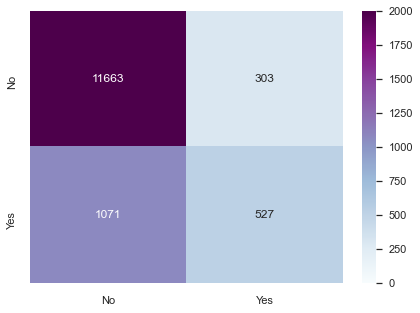

In [53]:
cm_log = confusion_matrix(y_test, y_pred_log, labels=[0, 1])
df_cm_log = pd.DataFrame(cm_log, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_log, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)


model predicted:

(no, no): 11,663 or 86% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 1071 or 8% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 303 or 2% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 527 or 4% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

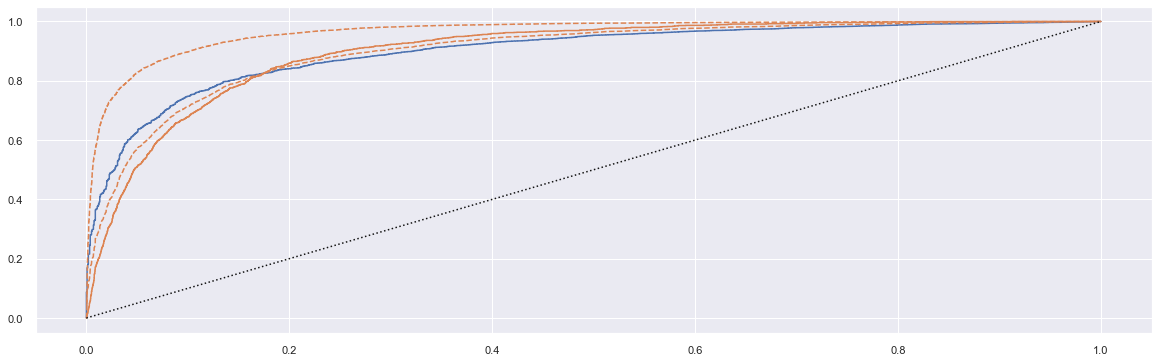

In [54]:
roc = ROCAUC(LogisticRegression())
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [55]:
fi2 = pd.DataFrame()
fi2['Column'] = X_train.columns
fi2['FI'] = np.round(abs(clf.coef_[0]),4)
fi2.sort_values(by='FI',ascending=False).head(10)

,Column,FI
37,poutcome_success,2.45
31,month_mar,1.35
28,month_jan,1.22
32,month_may,1.08
3,duration,1.06
29,month_jul,0.88
33,month_nov,0.86
22,housing_yes,0.77
30,month_jun,0.76
25,month_aug,0.75


**Decision Tree**

In [56]:
#decision tree

In [57]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)
y_pred_tree = dTree.predict(X_test) 
dTree.score(X_train, y_train)

1.0

In [58]:
print('Decision Tree Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_pred_tree)
print(cm)
print()

print("Training accuracy:")
print(dTree.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(dTree.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_pred_tree))
print()

print("Precision:")
print(precision_score(y_test,y_pred_tree))
print()

print("F1 Score:")
print(f1_score(y_test,y_pred_tree))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_pred_tree))
print()

Decision Tree Model Performance:

Confusion Matrix:
[[11115   851]
 [  840   758]]

Training accuracy:
1.0

Testing accuracy:
0.8753317605426127

Recall:
0.47434292866082606

Precision:
0.47110006215040395

F1 Score:
0.47271593389460553

Roc Auc Score:
0.701612380258877



In [59]:
#after pruning

In [60]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))
y_predict_prune = dTreeR.predict(X_test)

0.901317660441748
0.8974491300501327


In [61]:
print('Decision Tree Model Performance (After Pruning):')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_predict_prune)
print(cm)
print()

print("Training accuracy:")
print(dTreeR.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(dTreeR.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_predict_prune))
print()

print("Precision:")
print(precision_score(y_test,y_predict_prune))
print()

print("F1 Score:")
print(f1_score(y_test,y_predict_prune))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_predict_prune))
print()

Decision Tree Model Performance (After Pruning):

Confusion Matrix:
[[11647   319]
 [ 1072   526]]

Training accuracy:
0.901317660441748

Testing accuracy:
0.8974491300501327

Recall:
0.32916145181476847

Precision:
0.6224852071005917

F1 Score:
0.43061809250920996

Roc Auc Score:
0.6512512925127661



In [62]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))
y_predict = dTreeR.predict(X_test)

0.901317660441748
0.8974491300501327


In [63]:
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

<AxesSubplot:>

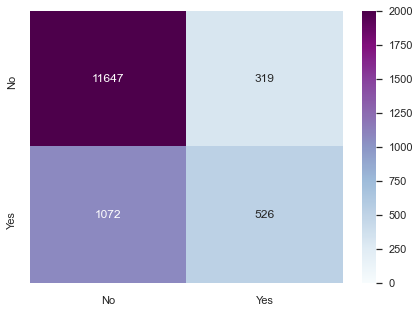

In [64]:
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)

model predicted:

(no, no): 11,647 or 86% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 1072 or 8% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 319 or 2% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 526 or 4% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

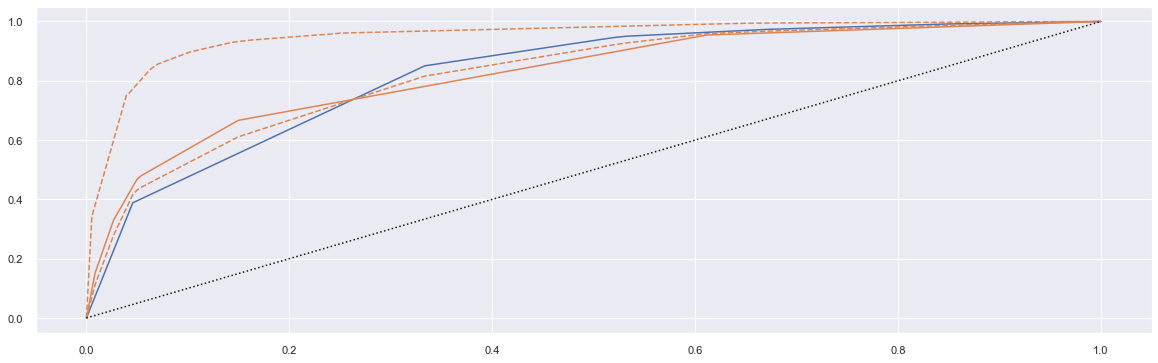

In [65]:
roc = ROCAUC(DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [66]:
fi2 = pd.DataFrame()
fi2['Column'] = X_train.columns
fi2['FI'] = np.round(abs(dTreeR.feature_importances_),4)
fi2.sort_values(by='FI',ascending=False).head(10)

,Column,FI
3,duration,0.68
37,poutcome_success,0.32
29,month_jul,0.00
22,housing_yes,0.00
23,loan_yes,0.00
24,contact_telephone,0.00
25,month_aug,0.00
26,month_dec,0.00
27,month_feb,0.00
28,month_jan,0.00


**Bagging**

In [67]:
# bagging

In [68]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl.score(X_test, y_test)

0.9012090828664111

In [69]:
# Bagging Model Performance:
print('Bagging Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,test_pred)
print(cm)
print('')

print("Training accuracy:")
print(bgcl.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(bgcl.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,test_pred))
print()

print("Precision:")
print(precision_score(y_test,test_pred))
print()

print("F1 Score:")
print(f1_score(y_test,test_pred))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,test_pred))
print()

Bagging Model Performance:

Confusion Matrix:
[[11556   410]
 [  930   668]]

Training accuracy:
0.9933327013618984

Testing accuracy:
0.9012090828664111

Recall:
0.41802252816020025

Precision:
0.6196660482374768

F1 Score:
0.4992526158445441

Roc Auc Score:
0.6918793904381144



<AxesSubplot:>

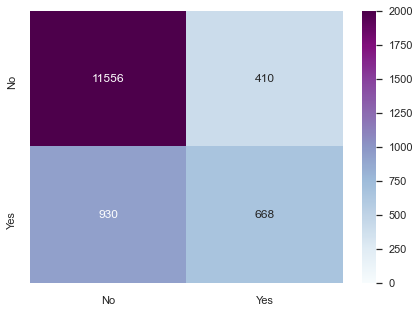

In [70]:
cm_bag = confusion_matrix(y_test, test_pred, labels=[0, 1])
df_cm_bag = pd.DataFrame(cm_bag, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_bag, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)

model predicted:

(no, no): 11,541 or 85% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 910 or 7% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 425 or 3% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 688 or 5% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

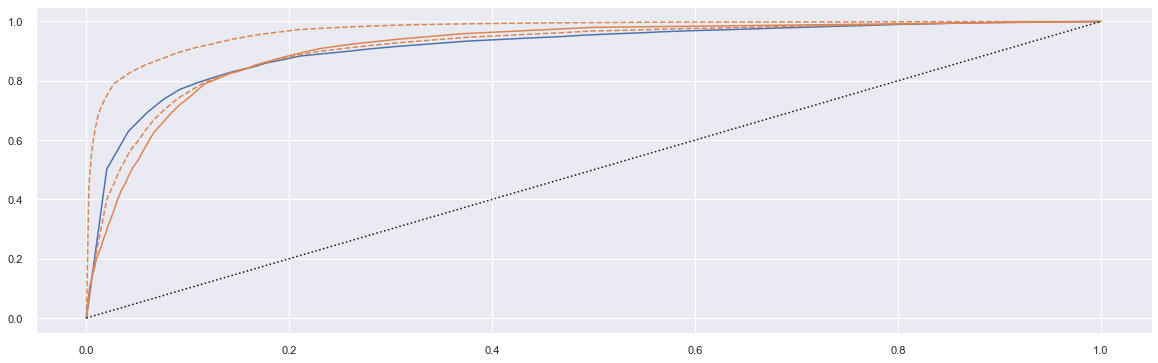

In [71]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

--special note:

I was unable to produce a feature list for bagging.

**Adaboost**

In [72]:
# adaboost

In [73]:
abcl = AdaBoostClassifier(n_estimators= 20, random_state=1)
abcl = abcl.fit(X_train, y_train)
test_pred_ada = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.8939103509289296

In [74]:
# adaboost Model Performance:
print('adaboost Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,test_pred_ada)
print(cm)
print('')

print("Training accuracy:")
print(abcl.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(abcl.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,test_pred_ada))
print()

print("Precision:")
print(precision_score(y_test,test_pred_ada))
print()

print("F1 Score:")
print(f1_score(y_test,test_pred_ada))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,test_pred_ada))
print()

adaboost Model Performance:

Confusion Matrix:
[[11540   426]
 [ 1013   585]]

Training accuracy:
0.8956931146712168

Testing accuracy:
0.8939103509289296

Recall:
0.3660826032540676

Precision:
0.5786350148367952

F1 Score:
0.44844768110387123

Roc Auc Score:
0.6652408670624341



<AxesSubplot:>

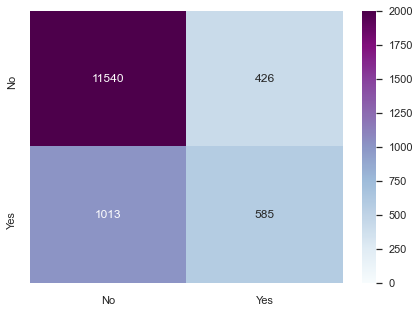

In [75]:
cm_ada = confusion_matrix(y_test, test_pred_ada, labels=[0, 1])
df_cm_ada = pd.DataFrame(cm_ada, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_ada, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)

model predicted:

(no, no): 11,540 or 85% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 1013 or 7% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 426 or 3% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 585 or 4% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

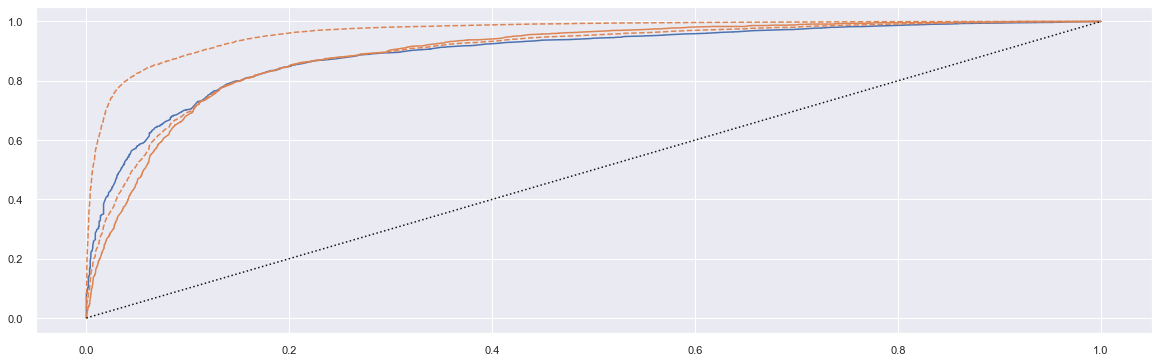

In [76]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 20, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [77]:
fi2 = pd.DataFrame()
fi2['Column'] = X_train.columns
fi2['FI'] = np.round(abs(abcl.feature_importances_),4)
fi2.sort_values(by='FI',ascending=False).head(10)

,Column,FI
3,duration,0.30
0,age,0.10
37,poutcome_success,0.10
22,housing_yes,0.05
5,pdays,0.05
35,month_sep,0.05
34,month_oct,0.05
4,campaign,0.05
32,month_may,0.05
31,month_mar,0.05


**Random Forest**

In [78]:
# random forest

In [79]:
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
y_predict_rf = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.8936154526688292

In [80]:
# adaboost Model Performance:
print('Random Forest Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_predict_rf)
print(cm)
print('')

print("Training accuracy:")
print(abcl.score(X_train,y_train))  
print()

print("Testing accuracy:")
print(abcl.score(X_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_predict_rf))
print()

print("Precision:")
print(precision_score(y_test,y_predict_rf))
print()

print("F1 Score:")
print(f1_score(y_test,y_predict_rf))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_predict_rf))
print()

Random Forest Model Performance:

Confusion Matrix:
[[11903    63]
 [ 1380   218]]

Training accuracy:
0.8956931146712168

Testing accuracy:
0.8939103509289296

Recall:
0.13642052565707133

Precision:
0.7758007117437722

F1 Score:
0.2320383182543906

Roc Auc Score:
0.5655778041957428



<AxesSubplot:>

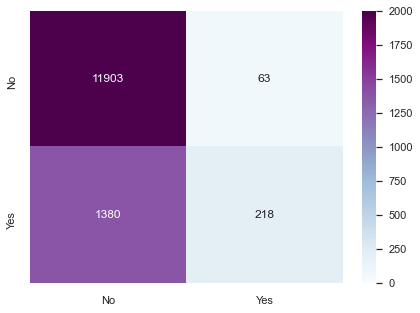

In [81]:
cm_rf = confusion_matrix(y_test, y_predict_rf, labels=[0, 1])
df_cm_rf = pd.DataFrame(cm_rf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rf, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)

model predicted:

(no, no): 11,923 or 88% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 1406 or 10% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 43 or 0.3% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 192 or 1% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

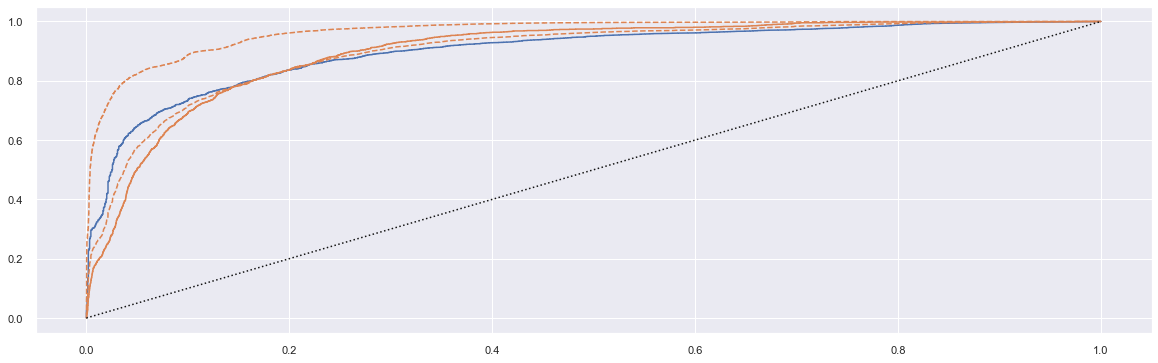

In [82]:
roc = ROCAUC(RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [83]:
fi = pd.DataFrame()
fi['Column'] = X_train.columns
fi['FI'] = np.round(abs(rfcl.feature_importances_),4)
fi.sort_values(by='FI',ascending=False).head(10)

,Column,FI
3,duration,0.41
37,poutcome_success,0.19
22,housing_yes,0.07
5,pdays,0.06
6,previous,0.05
0,age,0.04
32,month_may,0.03
34,month_oct,0.03
1,balance,0.02
31,month_mar,0.02


**Gradient Boost**

In [84]:
#gradient Boost

In [85]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05, random_state=1)
gbcl = gbcl.fit(X_train, y_train)
test_pred_gb = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.8971542317900324

In [86]:
# Gradient Boost Model Performance:
print('Gradient Boost Model Performance:')
print('')
print('Confusion Matrix:')
cm = confusion_matrix(y_test,test_pred_gb)
print(cm)
print('')

print("Training accuracy:")
train_acc_gbcl = gbcl.score(X_train,y_train)
print(train_acc_gbcl)  
print()

print("Testing accuracy:")
test_acc_gbcl = gbcl.score(X_test, y_test)
print(test_acc_gbcl)
print()

print("Recall:")
print(recall_score(y_test,test_pred_gb))
print()

print("Precision:")
print(precision_score(y_test,test_pred_gb))
print()

print("F1 Score:")
print(f1_score(y_test,test_pred_gb))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,test_pred_gb))
print()

Gradient Boost Model Performance:

Confusion Matrix:
[[11763   203]
 [ 1192   406]]

Training accuracy:
0.9018864347331501

Testing accuracy:
0.8971542317900324

Recall:
0.25406758448060074

Precision:
0.6666666666666666

F1 Score:
0.367920253738106

Roc Auc Score:
0.6185514255346344



<AxesSubplot:>

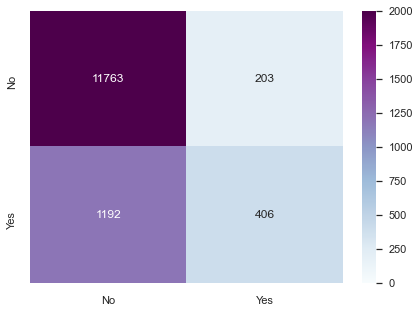

In [87]:
cm_gb = confusion_matrix(y_test, test_pred_gb, labels=[0, 1])
df_cm_gb = pd.DataFrame(cm_gb, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gb, annot=True ,fmt='g', cmap="BuPu", vmin=0, vmax=2000)

model predicted:

(no, no): 11,763 or 87% correctly predicted to have subscribed to a term deposit, and actually did not subscribe to a term deposit.

(yes, no): 1192 or 9% incorrectly predicted to not subscribed to a term deposit, but actually did subscribe to a term deposit.

(no, yes): 203 or 1% incorrectly predicted to have subscribed to a term deposit, but actually did not subscribe to a term deposit.

(yes, yes): 406 or 3% correctly predicted to have subscribed to a term deposit, and did subscribe to a term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:>, binary=None, classes=None, encoder=None,
       force_model=False, is_fitted='auto', macro=True, micro=True, model=None,
       per_class=True)

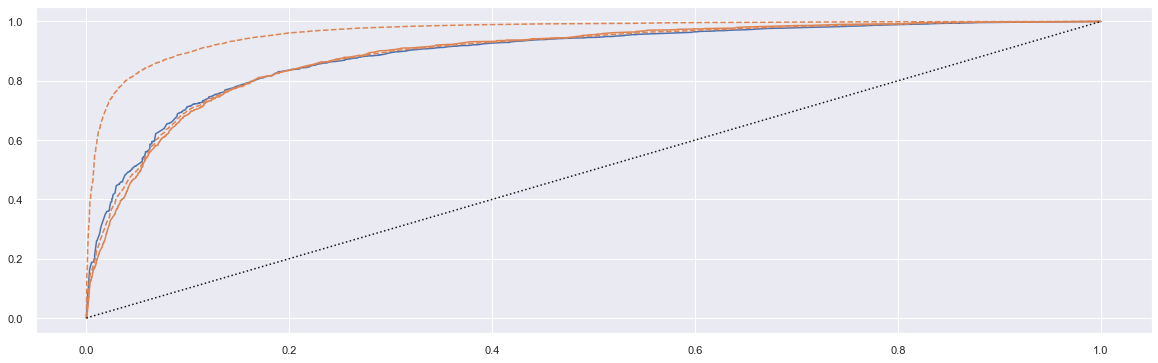

In [88]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05, random_state = 1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [89]:
fi = pd.DataFrame()
fi['Column'] = X_train.columns
fi['FI'] = np.round(abs(gbcl.feature_importances_),4)
fi.sort_values(by='FI',ascending=False).head(10)

,Column,FI
3,duration,0.55
37,poutcome_success,0.24
5,pdays,0.05
22,housing_yes,0.05
0,age,0.04
31,month_mar,0.03
34,month_oct,0.02
35,month_sep,0.01
2,day,0.00
32,month_may,0.00


**Overall Comparison**

In [90]:
#Overall Comparison

In [91]:
data_compare = {'Method':['Logistic Regression','Decision Tree','Bagging','Adaboost','Random Forest','Gradient Boost'],
                
               'Training Accuracy':[clf.score(X_train,y_train), dTreeR.score(X_train,y_train), bgcl.score(X_train,y_train), 
                                    abcl.score(X_train,y_train), rfcl.score(X_train,y_train), gbcl.score(X_train,y_train)],
                
               'Testing Accuracy':[clf.score(X_test, y_test), dTreeR.score(X_test, y_test), bgcl.score(X_test, y_test), 
                                   abcl.score(X_test, y_test), rfcl.score(X_test, y_test), gbcl.score(X_test, y_test)],
                
               'Recall':[recall_score(y_test,y_pred_log), recall_score(y_test,y_predict_prune), recall_score(y_test,test_pred), 
                         recall_score(y_test,test_pred_ada), recall_score(y_test,y_predict_rf), recall_score(y_test,test_pred_gb)],
                
               'Precision':[precision_score(y_test,y_pred_log), precision_score(y_test,y_predict_prune), precision_score(y_test,test_pred), 
                            precision_score(y_test,test_pred_ada), precision_score(y_test,y_predict_rf), precision_score(y_test,test_pred_gb)],
                
                'F1 Score':[f1_score(y_test,y_pred_log), f1_score(y_test,y_predict_prune), f1_score(y_test,test_pred), 
                            f1_score(y_test,test_pred_ada), f1_score(y_test,y_predict_rf), f1_score(y_test,test_pred_gb)],
                
                'ROC AUC Score':[roc_auc_score(y_test,y_pred_log), roc_auc_score(y_test,y_predict_prune), roc_auc_score(y_test,test_pred), 
                                 roc_auc_score(y_test,test_pred_ada), roc_auc_score(y_test,y_predict_rf), roc_auc_score(y_test,test_pred_gb)]
               }
    

In [92]:
#data_compare

Conclusion:

Comparing the ensembler methods and picking the best one:

In [93]:
df_compare = pd.DataFrame(data_compare)
df_compare['mean'] = df_compare.mean(axis=1)
df_compare

,Method,Training Accuracy,Testing Accuracy,Recall,Precision,F1 Score,ROC AUC Score,mean
0,Logistic Regression,0.90,0.90,0.33,0.63,0.43,0.65,0.64
1,Decision Tree,0.90,0.90,0.33,0.62,0.43,0.65,0.64
2,Bagging,0.99,0.90,0.42,0.62,0.50,0.69,0.69
3,Adaboost,0.90,0.89,0.37,0.58,0.45,0.67,0.64
4,Random Forest,0.89,0.89,0.14,0.78,0.23,0.57,0.58
5,Gradient Boost,0.90,0.90,0.25,0.67,0.37,0.62,0.62


**Conclusion:**

--> The best model out of the 6 models should be the model that has the highest percentage of true positive predictions, while reducing the number of false negative predictions.

--> As far as the algorithm possessing the highest average score for all tested metrics, bagging would be the method of choice.

--> For the model that has the high true positive predictions and the lowest false negative predictions, bagging would also be the method of choice.





**Important features:**

duration

poutcome_success

pdays

housing_yes

month

age